# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

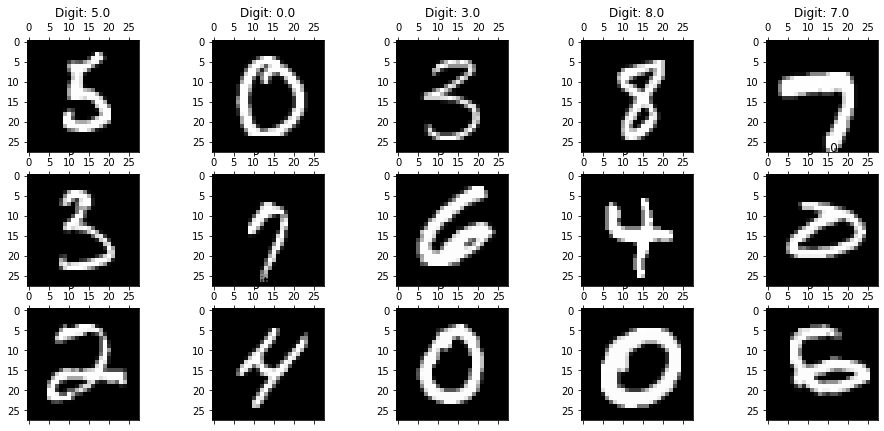

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)    

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56000, 784)
(14000, 784)
(56000, 1)
(14000, 1)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)

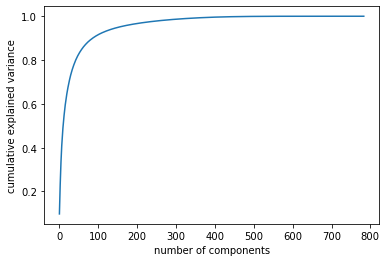

In [10]:
# PCA 누적 설명 비율 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [11]:
# 설명 비율 확인
print(np.cumsum(pca.explained_variance_ratio_)[40])

0.7916373853847


In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, np.ravel(y_train))

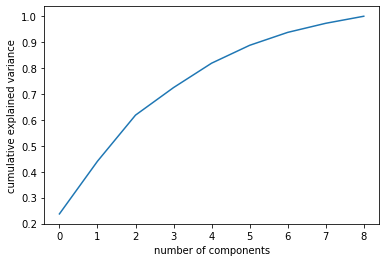

In [13]:
# LDA 누적 설명 비율 
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [14]:
# 설명 비율 확인
print(np.cumsum(lda.explained_variance_ratio_)[5])

0.8878111362398802


### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

## LogisticRegression

In [15]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action='ignore')

start_time = time.time() # 시간 측정 시작
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
end_time = time.time() # 시간 측정 종료

print("정확도 :", accuracy_score(y_test, predict))
print("시간 :", end_time-start_time)


정확도 : 0.9164285714285715
시간 : 68.2811291217804


### PCA

In [16]:
# PCA 이후 모델 학습
pca = PCA(n_components = 40)
X_train_pca = pca.fit_transform(X_train)

# 테스트 데이터셋에 PCA 적용
X_test_pca = pca.transform(X_test)

# 모델 학습
start_time = time.time()

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_pca, y_train)
predict_pca = lr.predict(X_test_pca)
end_time = time.time()

print("정확도 :", accuracy_score(y_test, predict_pca))
print("시간 :", end_time-start_time)

정확도 : 0.9032857142857142
시간 : 25.969620943069458


### LDA

In [17]:
# LDA 이후 모델 학습
lda = LinearDiscriminantAnalysis(n_components = 5)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))

# 테스트 데이터셋에 PCA 적용
X_test_lda = lda.transform(X_test)

start_time = time.time()

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_lda, np.ravel(y_train))
predict_lda = lr.predict(X_test_lda)
end_time = time.time()

print("정확도 :", accuracy_score(y_test, predict_lda))
print("시간 :", end_time-start_time)

정확도 : 0.8343571428571429
시간 : 1.5848698616027832


#### Training 결과

* Training 시간 : LDA > PCA > Original (빠른 순)
* Test Accuracy : Original > PCA > LDA

차원 축소 이후 정확도는 비슷하지만 감소했으며, 학습 시간은 크게 단축 되었다.

## Support Vector Classification

In [18]:
from sklearn.svm import SVC

start_time = time.time() # 시간 측정 시작
svc = SVC(kernel='linear', max_iter=1000, random_state=42)
svc.fit(X_train, y_train)
predict = svc.predict(X_test)
end_time = time.time() # 시간 측정 종료

print("정확도 :", accuracy_score(y_test, predict))
print("시간 :", end_time-start_time)

정확도 : 0.8136428571428571
시간 : 178.2197139263153


### PCA

In [21]:
start_time = time.time() # 시간 측정 시작
svc = SVC(kernel='linear', max_iter=1000, random_state=42)
svc.fit(X_train_pca, y_train)
predict_pca = svc.predict(X_test_pca)
end_time = time.time() # 시간 측정 종료

print("정확도 :", accuracy_score(y_test, predict_pca))
print("시간 :", end_time-start_time)

정확도 : 0.49257142857142855
시간 : 34.12255811691284


### LDA

In [22]:
start_time = time.time() # 시간 측정 시작
svc = SVC(kernel='linear', max_iter=1000, random_state=42)
svc.fit(X_train_lda, np.ravel(y_train))
predict_lda = svc.predict(X_test_lda)
end_time = time.time() # 시간 측정 종료

print("정확도 :", accuracy_score(y_test, predict_lda))
print("시간 :", end_time-start_time)

정확도 : 0.6470714285714285
시간 : 26.467388153076172


#### Training 결과

* Training 시간 : LDA > PCA > Original (빠른 순)
* Test Accuracy : Original > LDA > PCA

로지스틱 회귀에 비해 정확도가 감소했다.  
로지스틱 회귀와 마찬가지로 차원 축소 후 학습 시간은 크게 단축 되었지만, 정확도가 매우 크게 감소하였다.

##### 결론
* 정확도가 감소하지만 차원 축소를 적용했을 경우, 모델의 학습 시간을 크게 단축 시킬 수 있다.
* 파라미터에 따라 일부 차이가 있겠지만 PCA 보다 LDA의 차원 축소 성능이 더 낫다.
